In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

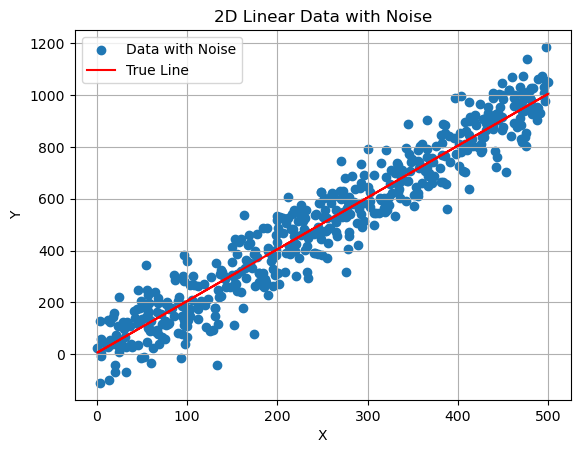

In [33]:
# Parameters
num_samples = 500
slope = 2
intercept = 5
noise_std = 80

# Generate random x values
x = np.random.uniform(0, 500, num_samples)

# Generate linear data with noise
y = slope * x + intercept + np.random.normal(0, noise_std, num_samples)

# Plot the data
plt.scatter(x, y, label='Data with Noise')
plt.plot(x, slope * x + intercept, color='red', label='True Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Linear Data with Noise')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
data_arr = np.vstack((x, y)).T
data_arr.shape

(500, 2)

In [35]:
data = pd.DataFrame(data=data_arr, columns=(("x", "y")))

In [36]:
data.head()

,x,y
0,187.392742,279.965835
1,471.300033,1074.100766
2,175.161134,264.385422
3,130.550752,177.526171
4,448.644693,914.706451


In [39]:
data.to_csv("2-d_linear_data.csv", index=False)

In [40]:
df = pd.read_csv("2-d_linear_data.csv")
df

,x,y
0,187.392742,279.965835
1,471.300033,1074.100766
2,175.161134,264.385422
3,130.550752,177.526171
4,448.644693,914.706451
...,...,...
495,220.320956,300.483697
496,3.484111,126.108565
497,102.712837,148.823024
498,353.041738,646.872745


In [50]:
from sklearn.linear_model import LinearRegression
X = np.array(df['x']).reshape(-1, 1)
y = np.array(df['y'])

linear_model = LinearRegression()
linear_model.fit(X, y)

pred_slope = linear_model.coef_[0]
pred_intercept = linear_model.intercept_

print("slope: ", pred_slope, "| intercept: ", pred_intercept)

slope:  2.0292282525184895 | intercept:  -2.8892974850285214


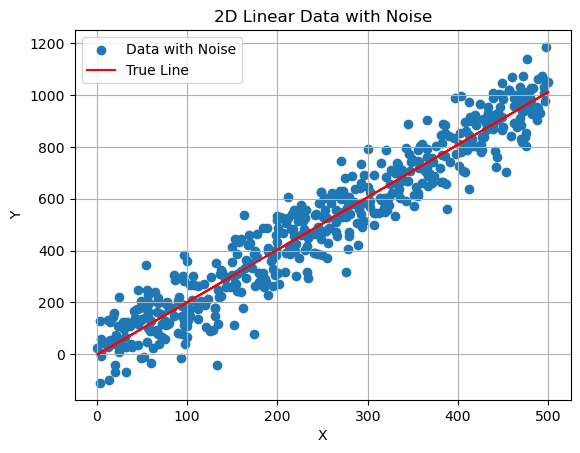

In [51]:
plt.scatter(X, y, label='Data with Noise')
plt.plot(X, pred_slope * X + pred_intercept, color='red', label='True Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Linear Data with Noise')
plt.legend()
plt.grid(True)
plt.show()

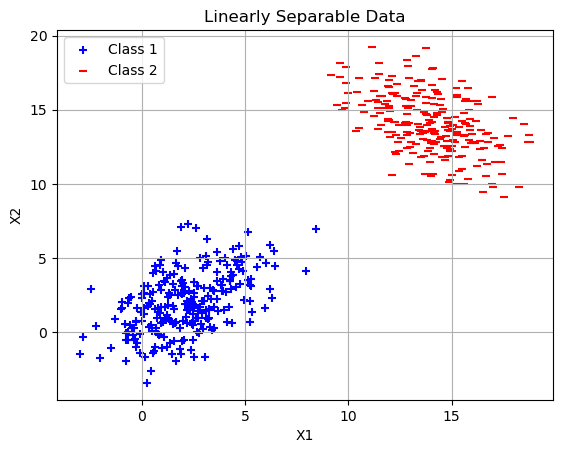

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_samples = 250

# Generate random points for class 1
mean_class1 = [2, 2]
cov_class1 = [[4, 2], [2, 4]]
class1_points = np.random.multivariate_normal(mean_class1, cov_class1, num_samples)

# Generate random points for class 2
mean_class2 = [14, 14]
cov_class2 = [[4, -2], [-2, 4]]
class2_points = np.random.multivariate_normal(mean_class2, cov_class2, num_samples)

# Plot the data
plt.scatter(class1_points[:, 0], class1_points[:, 1], color='blue', label='Class 1', marker="+")
plt.scatter(class2_points[:, 0], class2_points[:, 1], color='red', label='Class 2', marker="_")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable Data')
plt.legend()
plt.grid(True)
plt.show()


In [94]:
class1_points_wsign = np.hstack((class1_points, np.full((250, 1), 1)))
class1_points_wsign[:5]
                                

array([[ 2.33912642,  1.58458486,  1.        ],
       [ 1.55797438, -0.57034486,  1.        ],
       [ 3.78285229,  4.81377415,  1.        ],
       [ 4.87110971,  4.76864808,  1.        ],
       [-0.02495416,  1.35012155,  1.        ]])

In [96]:
class1_points_wsign.shape

(250, 3)

In [95]:
class2_points_wsign = np.hstack((class2_points, np.full((250, 1), -1)))
class2_points_wsign[:5]

array([[12.3365238 , 16.75946597, -1.        ],
       [12.97302233, 12.49327977, -1.        ],
       [12.75674203, 14.09404466, -1.        ],
       [16.69808722, 11.32733896, -1.        ],
       [12.91892461, 11.36219952, -1.        ]])

In [90]:
class2_points_wsign.shape

(250, 3)

In [97]:
perceptron_data = np.vstack((class1_points_wsign, class2_points_wsign))
perceptron_data.shape

(500, 3)

In [98]:
perceptron_data_df = pd.DataFrame(data=perceptron_data, columns=["x1", "x2", "class"])
perceptron_data_df

,x1,x2,class
0,2.339126,1.584585,1.0
1,1.557974,-0.570345,1.0
2,3.782852,4.813774,1.0
3,4.871110,4.768648,1.0
4,-0.024954,1.350122,1.0
...,...,...,...
495,17.097312,11.499794,-1.0
496,13.775893,14.732665,-1.0
497,15.907537,13.649588,-1.0
498,14.064229,14.163997,-1.0


In [101]:
perceptron_data_df.to_csv("perceptron_data.csv", index=False)

In [102]:
df2 = pd.read_csv("perceptron_data.csv")
df2

,x1,x2,class
0,2.339126,1.584585,1.0
1,1.557974,-0.570345,1.0
2,3.782852,4.813774,1.0
3,4.871110,4.768648,1.0
4,-0.024954,1.350122,1.0
...,...,...,...
495,17.097312,11.499794,-1.0
496,13.775893,14.732665,-1.0
497,15.907537,13.649588,-1.0
498,14.064229,14.163997,-1.0


In [133]:
y = df2['class']
y.shape

(500,)

In [132]:
X = np.hstack((np.array(df2['x1']).reshape(-1, 1), np.array(df2['x2']).reshape(-1, 1)))
X.shape

(500, 2)

In [137]:
from sklearn import svm
svm_clf = svm.SVC(kernel="linear")
svm_clf.fit(X, y)

SVC(kernel='linear')

In [138]:
svm_clf.coef_

array([[-0.27667012, -0.27181678]])

In [139]:
svm_clf.intercept_

array([5.22925809])

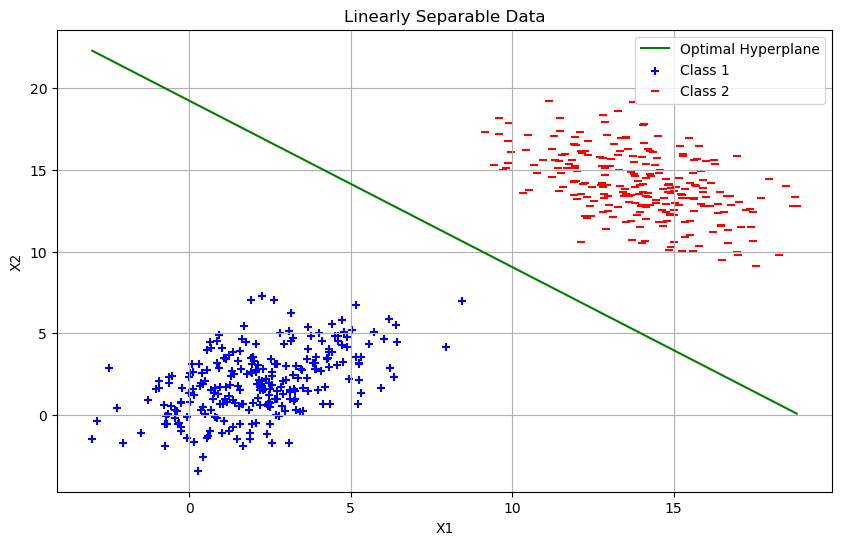

In [148]:
# Coefficients of the hyperplane
coefficients = svm_clf.coef_[0]

# Intercept of the hyperplane
intercept = svm_clf.intercept_[0]

# Compute slope and intercept of the line
slope = -coefficients[0] / coefficients[1]
intercept = -intercept / coefficients[1]

# Generate data points for plotting the line
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
y_values = slope * x_values + intercept

# Plotting the line of the optimal hyperplane
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, color='green', linestyle='-', label='Optimal Hyperplane')
plt.scatter(class1_points[:, 0], class1_points[:, 1], color='blue', label='Class 1', marker="+")
plt.scatter(class2_points[:, 0], class2_points[:, 1], color='red', label='Class 2', marker="_")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable Data')
plt.legend()
plt.grid(True)
plt.show()

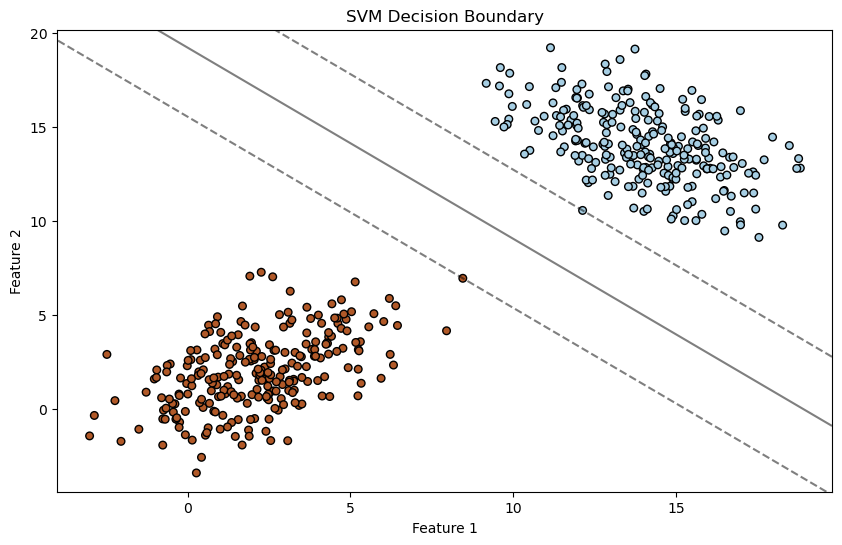

In [143]:
# Generate data for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', s=30)
Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()